In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

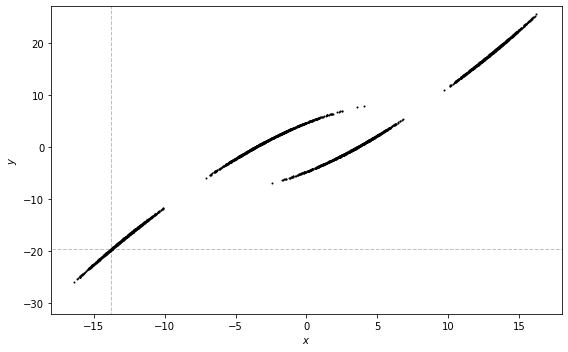

In [2]:
fig = plt.figure(figsize = (8,5))

x = np.load('x_full_area.npy')
y = np.load('y_full_area.npy')

skip = 777
plt.scatter(x[::skip], y[::skip], s = 1, c = 'k')

# Zoom in on same location as Fig. 5 in this paper:
# https://iopscience.iop.org/article/10.1088/0951-7715/16/3/314/pdf
a, b = -13.76431891885149, -19.57849004063768

plt.plot([a, a], [-50, 50], '--', c = 'k', lw = 1, alpha = 0.25)
plt.plot([-50, 50], [b, b], '--', c = 'k', lw = 1, alpha = 0.25)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.xlim(-18, 18)
plt.ylim(-32, 27)

plt.tight_layout()
plt.savefig('poincare_section.png', dpi = 240)

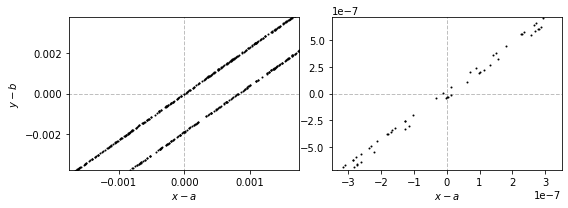

In [4]:
# Zoom in on same location as Fig. 5 in this paper:
# https://iopscience.iop.org/article/10.1088/0951-7715/16/3/314/pdf
a, b = -13.76431891885149, -19.57849004063768

fig, ax = plt.subplots(ncols = 2, figsize = (8, 3))

x = np.load('x_compressed.npy')
y = np.load('y_compressed.npy')


width = 1e-2

# Calculate range
xmin, xmax = a - width/2, a + width/2
ymin, ymax = b - width/2, b + width/2

# Create a mask, to plot only the points which fall inside the range
# (saves time and memory in plotting)
mask = ((xmin < x) & (x < xmax)) & ((ymin < y) & (y < ymax))

skip = 1000
ax[0].scatter(x[mask][::skip] - a, y[mask][::skip] - b, s = 1, c = 'k')
ax[0].set_xlim(-1.75e-3, 1.75e-3)
ax[0].set_ylim(-3.75e-3, 3.75e-3)

ax[0].plot([0, 0], [-50, 50], '--', c = 'k', lw = 1, alpha = 0.25)
ax[0].plot([-50, 50], [0, 0], '--', c = 'k', lw = 1, alpha = 0.25)


width = 1.5e-6

# Calculate range
xmin, xmax = a - width/2, a + width/2
ymin, ymax = b - width/2, b + width/2

# Create a mask, to plot only the points which fall inside the range
# (saves time and memory in plotting)
mask = ((xmin < x) & (x < xmax)) & ((ymin < y) & (y < ymax))

ax[1].scatter(x[mask] - a, y[mask] - b, s = 1, c = 'k')

ax[0].set_xlabel('$x-a$')
ax[0].set_ylabel('$y-b$')
ax[1].set_xlabel('$x-a$')

ax[0].set_xticks([-0.001, 0, 0.001])

ax[1].plot([0, 0], [-50, 50], '--', c = 'k', lw = 1, alpha = 0.25)
ax[1].plot([-50, 50], [0, 0], '--', c = 'k', lw = 1, alpha = 0.25)

ax[1].set_xlim(-3.5e-7, 3.5e-7)
ax[1].set_ylim(-7.1e-7, 7.1e-7)

plt.tight_layout()
plt.savefig('poincare_section_zoomed.png', dpi = 240)